In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Okay! So here we're going to be exploring different year' catches per unit effort! That's the total amount of things caught, divided by how many times we went seining. Which should be equivalent to the average catch for each year.

In [132]:
db = pd.read_csv('Created CSVs/Cleaned_For_Analysis_All_Data.csv')

## Here we're ditching comb jellies from the analysis, as our  marking of their catch is a it weird. That said, perhaps they should be included. Worth questioning

In [133]:

nojelly_db = db[~db['Grouped Corrected Common Name'].isin(['comb jelly'])]
#nojelly_db = db[db['Grouped Corrected Common Name'] != 'comb jelly']

In [134]:
db.columns

Index([u'Unnamed: 0', u'Date', u'Time', u'Weather & Air Temp:', u'Water Temp:',
       u'Corrected Water Temp:', u'pH', u'Corrected pH', u'DO',
       u'Corrected DO', u'Turbidity', u'Salinity', u'Corrected Salinity',
       u'Tide is moving', u'Tide Times', u'# Hauls', u'Corrected # Hauls',
       u'Common Name', u'Corrected Common Name',
       u'Grouped Corrected Common Name', u'Quantity', u'Corrected Quantity',
       u'Scientific Name', u'Instructors/ Seine Staff:',
       u'# student seiners (CLASSES ONLY)',
       u'# of visitors (Public Seine ONLY)', u'# Brought to Ed Center',
       u'Other info (Gender, Length, Dead/Alive, other physical description)',
       u'NOTES FROM SEINEING SEASON:'],
      dtype='object')

In [135]:
graph_db = db[['Date','Time','Corrected # Hauls','Corrected Common Name','Corrected Quantity', 'Grouped Corrected Common Name' ]]

In [136]:
nojellygraph_db = nojelly_db[['Date','Time','Corrected # Hauls','Corrected Common Name','Corrected Quantity' ]]

In [137]:
import dateutil

In [138]:
graph_db['Date'] = [dateutil.parser.parse(date) for date in graph_db['Date']]
nojellygraph_db['Date'] = [dateutil.parser.parse(date) for date in nojellygraph_db['Date']]

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [139]:
graph_db['Year'] = [date.year for date in graph_db['Date']]
nojellygraph_db['Year'] = [date.year for date in nojellygraph_db['Date']]

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [140]:
agraph_db = graph_db[graph_db['Year']>2010]
anojellygraph_db = nojellygraph_db[nojellygraph_db['Year']>2010]

In [141]:
grouped_graph_db = agraph_db.groupby('Date', as_index = False).sum()
nojellygrouped_graph_db = anojellygraph_db.groupby('Date', as_index = False).sum()

In [142]:
grouped_graph_db['Month'] =  [x.month for x in grouped_graph_db['Date']]
nojellygrouped_graph_db['Month'] =  [x.month for x in nojellygrouped_graph_db['Date']]

In [143]:
mgrouped_graph_db = grouped_graph_db.groupby('Month', as_index = False).median()

mnojellygrouped_graph_db = nojellygrouped_graph_db.groupby('Month', as_index = False).median()

In [144]:
mgrouped_graph_db

,Month,Corrected # Hauls,Corrected Quantity,Year
0,4,NaN,23.0,10060.0
1,5,7.0,19.0,12066.0
2,6,110.0,43.0,12099.0
3,7,118.5,37.5,16124.0
4,8,160.0,86.0,12066.0
5,9,174.0,68.0,20110.0
6,10,69.0,22.0,12072.0


In [145]:
grouped_graph_db = grouped_graph_db.groupby('Month', as_index = False).mean()

nojellygrouped_graph_db = nojellygrouped_graph_db.groupby('Month', as_index = False).mean()

In [146]:
grouped_graph_db

,Month,Corrected # Hauls,Corrected Quantity,Year
0,4,NaN,23.000000,10060.000000
1,5,34.000000,40.400000,11138.333333
2,6,93.714286,56.538462,15109.000000
3,7,129.625000,49.727273,15936.590909
4,8,189.571429,120.105263,16015.894737
5,9,178.250000,106.684211,20782.894737
6,10,74.500000,35.545455,11361.272727


In [147]:
nojellygrouped_graph_db

,Month,Corrected # Hauls,Corrected Quantity,Year
0,4,NaN,23.000000,10060.000000
1,5,42.500000,34.714286,10927.500000
2,6,83.714286,31.115385,13559.576923
3,7,121.375000,31.318182,14288.590909
4,8,172.428571,81.421053,13789.684211
5,9,162.750000,82.210526,18662.315789
6,10,65.750000,20.800000,10683.400000


In [148]:
sns.set(rc={'figure.figsize':(7,4)})

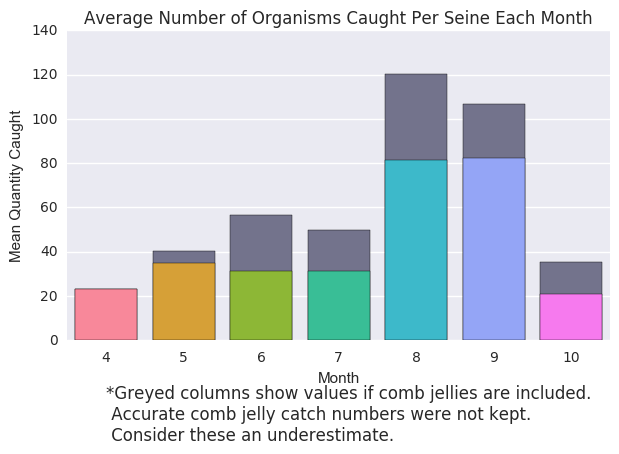

In [149]:

ax = sns.barplot(x="Month", y="Corrected Quantity", data=grouped_graph_db, color= 'blue',saturation = 0.1)
ax = sns.barplot(x="Month", y="Corrected Quantity", data=nojellygrouped_graph_db, saturation=1)
ax.set_title("Average Number of Organisms Caught Per Seine Each Month")
ax.set_ylabel('Mean Quantity Caught')
ax.text(0,-45,'*Greyed columns show values if comb jellies are included. \n Accurate comb jelly catch numbers were not kept.\n Consider these an underestimate.' )
ax.figure.savefig('Graphs/Mean Catch Per Seine By Month', bbox_inches='tight')

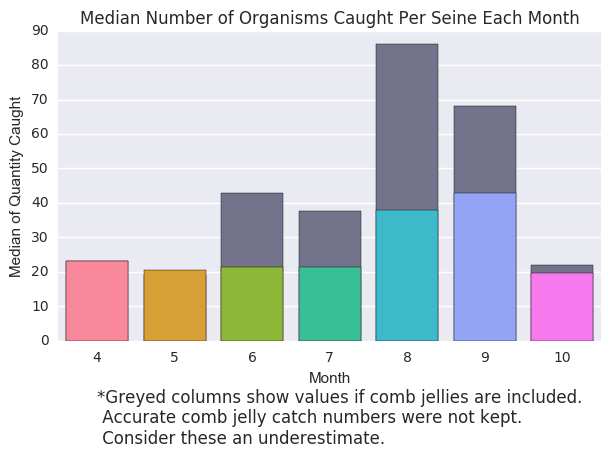

In [150]:
ax = sns.barplot(x="Month", y="Corrected Quantity", data=mgrouped_graph_db, color= 'blue',saturation = 0.1)
ax = sns.barplot(x="Month", y="Corrected Quantity", data=mnojellygrouped_graph_db, saturation=1)
ax.set_title("Median Number of Organisms Caught Per Seine Each Month")
ax.set_ylabel('Median of Quantity Caught')
ax.text(0,-30,'*Greyed columns show values if comb jellies are included. \n Accurate comb jelly catch numbers were not kept.\n Consider these an underestimate.' )
ax.figure.savefig('Graphs/Median Catch Per Seine By Month', bbox_inches='tight')

## And we've simplified our dataframe and added year to it

## Let's make a general for funsies graph of catches per year.
### This shows the results without jellies, and there is a bit of a difference.

In [151]:
grouped_db = graph_db.groupby('Year', as_index=False).sum()
nojellygrouped_db =nojellygraph_db.groupby('Year', as_index=False).sum()

In [152]:
grouped_db

,Year,Corrected # Hauls,Corrected Quantity
0,2008,NaN,17
1,2009,NaN,16
2,2010,NaN,123
3,2011,NaN,1345
4,2012,NaN,664
5,2013,NaN,687
6,2014,NaN,213
7,2015,NaN,1381
8,2016,1233.0,1699
9,2017,1413.0,921


In [153]:
#grouped_db = grouped_db[grouped_db['Year']<2019]
#nojellygrouped_db = nojellygrouped_db[nojellygrouped_db['Year']<2019]

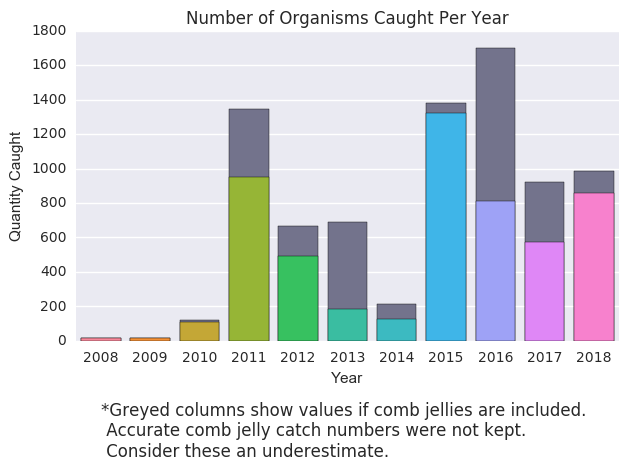

In [154]:
ax = sns.barplot(x="Year", y="Corrected Quantity", data=grouped_db, color= 'blue',saturation = 0.1)
ax = sns.barplot(x="Year", y="Corrected Quantity", data=nojellygrouped_db, saturation=1)
ax.set_title("Number of Organisms Caught Per Year")
ax.set_ylabel('Quantity Caught')
ax.text(0,-675,'*Greyed columns show values if comb jellies are included. \n Accurate comb jelly catch numbers were not kept.\n Consider these an underestimate.' )
ax.figure.savefig('Graphs/Number of Organisms Caught Per Year (comb jelly shadows)', bbox_inches='tight')

## Alright, let's find the average catch per year

# Error here: there are multiple seins on the same date so this method does not work

In [155]:
graph_db['Date_Time'] = [str(x) for x in zip(list(graph_db['Date']), list(graph_db['Time']))]
nojellygraph_db['Date_Time'] = [str(x) for x in zip(list(nojellygraph_db['Date']), list(nojellygraph_db['Time']))]

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [156]:
graph_db.tail()

,Date,Time,Corrected # Hauls,Corrected Common Name,Corrected Quantity,Grouped Corrected Common Name,Year,Date_Time
1017,2018-10-06,9:30 AM -,14.0,mud snail,2,sea snail,2018,"(Timestamp('2018-10-06 00:00:00'), '9:30 AM -')"
1018,2018-10-18,4:20 PM - 5:20 PM,7.0,striped bass,8,striped bass,2018,"(Timestamp('2018-10-18 00:00:00'), '4:20 PM - ..."
1019,2018-10-18,4:20 PM - 5:20 PM,7.0,atlantic silverside,13,atlantic silverside,2018,"(Timestamp('2018-10-18 00:00:00'), '4:20 PM - ..."
1020,2018-10-18,4:20 PM - 5:20 PM,7.0,unidentified flatfish,1,flatfish,2018,"(Timestamp('2018-10-18 00:00:00'), '4:20 PM - ..."
1021,2018-10-18,4:20 PM - 5:20 PM,7.0,unidentified herring,2,herring,2018,"(Timestamp('2018-10-18 00:00:00'), '4:20 PM - ..."


# Error here where if you only caught comb jellies the seine is not counted for the no comb jellies one

In [158]:
D = {}
Species_count = {}
for year in list(set(graph_db['Year'])):
    if  year < 2019:
        year_data = graph_db[graph_db['Year'] == year]
        #print year, set(year_data['Date'])
        D[year] = len(list(set(year_data['Date_Time'])))
        Species_count[year] = len(list(set(year_data['Corrected Common Name'])))
        
nojellyD = {}
nojellySpecies_count = {}
for year in list(set(nojellygraph_db['Year'])):
    if  year < 2019:
        year_data = nojellygraph_db[nojellygraph_db['Year'] == year]
        #print year, set(year_data['Date'])
        nojellyD[year] = len(list(set(year_data['Date_Time'])))
        nojellySpecies_count[year] = len(list(set(year_data['Corrected Common Name'])))

In [165]:
grouped_db['# of Seins'] = [D[x] for x in grouped_db['Year']]
nojellygrouped_db['# of Seins'] = [D[x] for x in grouped_db['Year']]

In [166]:
grouped_db['# of Species'] = [Species_count[x] for x in grouped_db['Year']]
nojellygrouped_db['# of Species'] = [nojellySpecies_count[x] for x in nojellygrouped_db['Year']]

In [167]:
grouped_db['Catch Per Seine'] = 1.0*grouped_db['Corrected Quantity'] /grouped_db['# of Seins']
nojellygrouped_db['Catch Per Seine'] = 1.0*nojellygrouped_db['Corrected Quantity'] /nojellygrouped_db['# of Seins']

In [168]:
grouped_db

,Year,Corrected # Hauls,Corrected Quantity,# of Seins,# of Species,Catch Per Seine
0,2008,NaN,17,1,17,17.000000
1,2009,NaN,16,2,15,8.000000
2,2010,NaN,123,14,34,8.785714
3,2011,NaN,1345,17,30,79.117647
4,2012,NaN,664,16,35,41.500000
5,2013,NaN,687,13,24,52.846154
6,2014,NaN,213,6,23,35.500000
7,2015,NaN,1381,16,40,86.312500
8,2016,1233.0,1699,21,52,80.904762
9,2017,1413.0,921,15,41,61.400000


In [169]:
nojellygrouped_db

,Year,Corrected # Hauls,Corrected Quantity,# of Seins,# of Species,Catch Per Seine
0,2008,NaN,16,1,16,16.000000
1,2009,NaN,15,2,14,7.500000
2,2010,NaN,109,14,33,7.785714
3,2011,NaN,952,17,29,56.000000
4,2012,NaN,494,16,34,30.875000
5,2013,NaN,182,13,22,14.000000
6,2014,NaN,127,6,22,21.166667
7,2015,NaN,1323,16,39,82.687500
8,2016,1079.0,812,21,51,38.666667
9,2017,1278.0,574,15,40,38.266667


## Keeping this graph

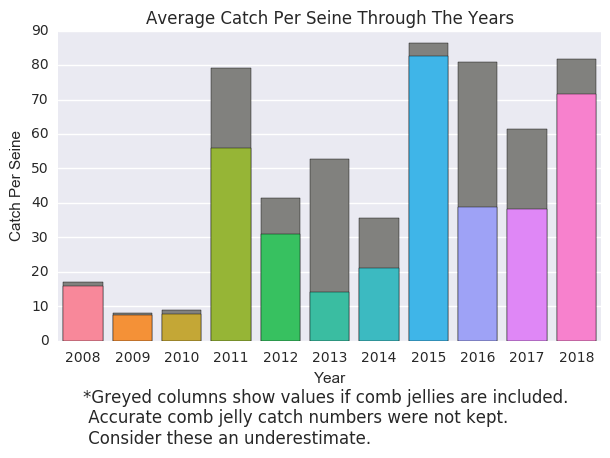

In [170]:
ax = sns.barplot(x="Year", y="Catch Per Seine", data=grouped_db,color = 'yellow',saturation =0.01)
ax = sns.barplot(x="Year", y="Catch Per Seine", data=nojellygrouped_db, saturation = 1)
ax.set_title('Average Catch Per Seine Through The Years')
ax.text(0,-30,'*Greyed columns show values if comb jellies are included. \n Accurate comb jelly catch numbers were not kept.\n Consider these an underestimate.' )
ax.figure.savefig('Graphs/Average Catch Per Seine (comb jelly shadows)', bbox_inches='tight')

## And just looking at recent years

In [90]:
recent_grouped_db =  grouped_db[grouped_db['Year'] >2013]
recent_nojellygrouped_db = nojellygrouped_db[nojellygrouped_db['Year'] > 2013]

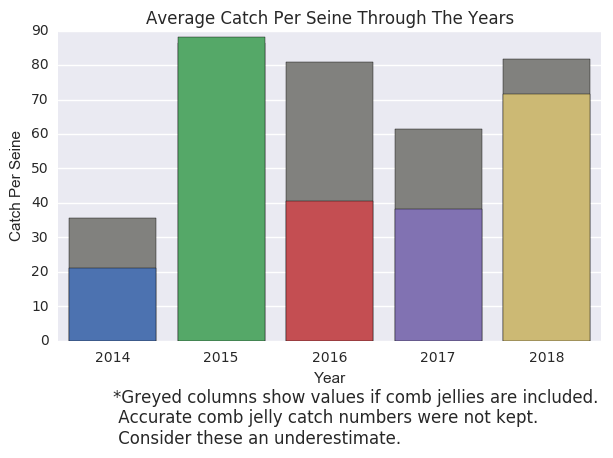

In [91]:
ax = sns.barplot(x="Year", y="Catch Per Seine", data=recent_grouped_db,color = 'yellow',saturation =0.01)
ax = sns.barplot(x="Year", y="Catch Per Seine", data=recent_nojellygrouped_db, saturation = 1)
ax.set_title('Average Catch Per Seine Through The Years')
ax.text(0,-30,'*Greyed columns show values if comb jellies are included. \n Accurate comb jelly catch numbers were not kept.\n Consider these an underestimate.' )
ax.figure.savefig('Graphs/Recent Average Catch Per Seine (comb jelly shadows)', bbox_inches='tight')

## And this one

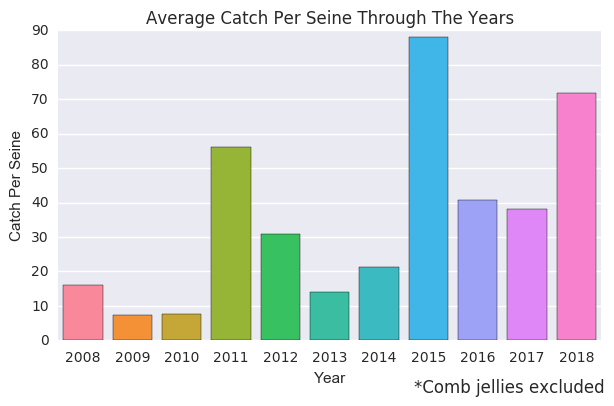

In [93]:
ax = sns.barplot(x="Year", y="Catch Per Seine", data=nojellygrouped_db, saturation = 1)
ax.set_title('Average Catch Per Seine Through The Years')
ax.text(6.7,-15,'*Comb jellies excluded' )
ax.figure.savefig('Graphs/Average Catch Per Seine',  bbox_inches='tight')

## Here's a nicer way of making that same graph

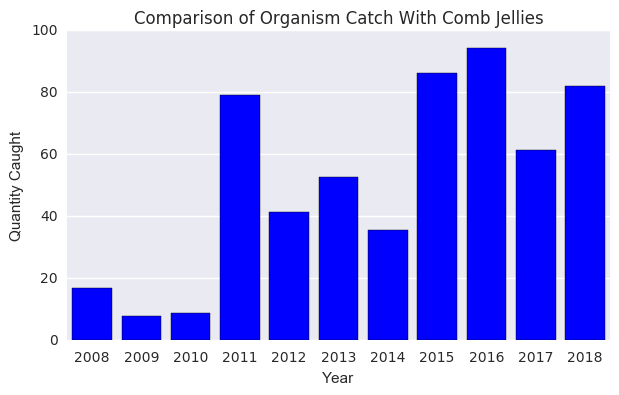

In [94]:
dgrouped_db = graph_db.groupby('Date', as_index=False).sum()

dgrouped_db = dgrouped_db[['Date', 'Corrected Quantity']]

dgrouped_db['Year'] = [x.year for x in dgrouped_db.Date]

dgrouped_db = dgrouped_db.groupby('Year', as_index=False).mean()

ax = sns.barplot(x="Year", y="Corrected Quantity", data=dgrouped_db, color= 'blue',saturation = 1)
#ax = sns.barplot(x="Year", y="Corrected Quantity", data=nojellygrouped_db, saturation=1)
ax.set_title("Comparison of Organism Catch With Comb Jellies")
ax.set_ylabel('Quantity Caught')

## And let's get the total count broken down by species

In [95]:
df = graph_db[['Grouped Corrected Common Name', 'Corrected Quantity','Year']]


In [96]:
new_li = []
for value in df['Grouped Corrected Common Name']:
    if value not in ['atlantic silverside','comb jelly', 'shrimp', 'tunicates', 'sea snail']:
        new_li.append('Other Organisms')
    else:
        new_li.append(value)

In [97]:
df['Grouped Corrected Common Name'] = new_li

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [99]:
df.tail()

,Grouped Corrected Common Name,Corrected Quantity,Year
1017,sea snail,2,2018
1018,Other Organisms,8,2018
1019,atlantic silverside,13,2018
1020,Other Organisms,1,2018
1021,Other Organisms,2,2018


In [100]:
our_df = df.groupby(['Grouped Corrected Common Name', 'Year'], as_index=False).sum()


In [101]:
#our_df = our_df[our_df['Year'] != 2018]

In [102]:
set(our_df['Grouped Corrected Common Name'])

{'Other Organisms',
 'atlantic silverside',
 'comb jelly',
 'sea snail',
 'shrimp',
 'tunicates'}

In [103]:
animal_dict = {'Other Organisms':[], 'shrimp': [], 'atlantic silverside':[],'comb jelly': [], 'tunicates': [], 'sea snail' : [] }

In [104]:
for year in range(2008,2019):
    curr_df  = our_df[our_df['Year'] == year]
    for animal in animal_dict:
        if len(curr_df[curr_df['Grouped Corrected Common Name'] == animal]['Corrected Quantity']) < 1:
            animal_dict[animal] += [0]
        else:
            animal_dict[animal] += list(curr_df[curr_df['Grouped Corrected Common Name'] == animal]['Corrected Quantity'])

In [105]:
for animal in animal_dict:
    animal_dict[animal].insert(0,animal)

In [106]:
head = ['species'] + range(2008,2019)

bars1 = our_df[our_df['Grouped Corrected Common Name'] == 'Other Organisms']['Corrected Quantity']
bars2 = our_df[our_df['Grouped Corrected Common Name'] == 'atlantic silverside']['Corrected Quantity']
bars3 = our_df[our_df['Grouped Corrected Common Name'] == 'comb jelly']['Corrected Quantity']
shrimp = our_df[our_df['Grouped Corrected Common Name'] == 'shrimp']['Corrected Quantity']
tunicate = our_df[our_df['Grouped Corrected Common Name'] == 'tunicates']['Corrected Quantity']
snail = our_df[our_df['Grouped Corrected Common Name'] == 'sea snail']['Corrected Quantity']
print tunicate
head = ['species'] + range(2008,2018)
shrimp = list(shrimp)
shrimp.insert(0,'shrimp')
org =  list(bars1)
org.insert(0, 'other organisms')
atl = list(bars2)
atl.insert(0, 'atlantic silverside')
comb = list(bars3)
comb.insert(0, 'comb jelly')
tunicate = list(tunicate)
tunicate.insert(0, 'tunicates')
snail = list(snail)
snail.insert(0, 'sea snail')

In [107]:
df2 = pd.DataFrame(columns=head, data=[animal_dict['Other Organisms'], animal_dict['sea snail'],animal_dict['tunicates'], animal_dict['shrimp'], animal_dict['atlantic silverside'], animal_dict['comb jelly']])

In [108]:
df2

,species,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Other Organisms,11,10,78,419,145,95,76,240,354,374,281
1,sea snail,0,1,2,73,22,2,0,9,113,57,38
2,tunicates,1,1,0,76,89,1,0,20,64,32,0
3,shrimp,3,2,16,129,58,10,9,24,31,74,75
4,atlantic silverside,1,1,13,255,180,74,42,1030,250,37,466
5,comb jelly,1,1,14,393,170,505,86,58,887,347,123


## And this one

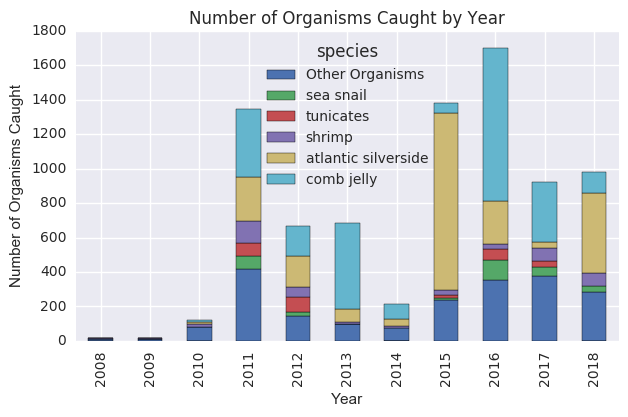

In [109]:

import seaborn as sns
sns.set()
df2.set_index('species').T.plot(kind='bar', stacked=True)
plt.title('Number of Organisms Caught by Year')
plt.xlabel('Year')
plt.ylabel('Number of Organisms Caught')
plt.savefig('Graphs/Specific Organisms Caught by Year, stacked bar chart')

## Now we'll get a look at how many species get caught each year

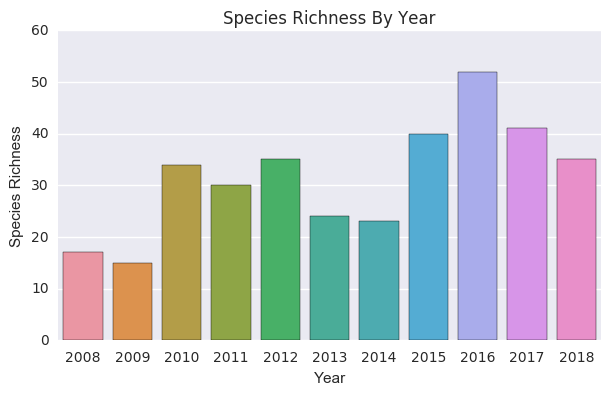

In [111]:
ax = sns.barplot(x="Year", y="# of Species", data=grouped_db)
ax.set_title('Species Richness By Year')
ax.set_ylabel('Species Richness')
ax.figure.savefig('Graphs/Number of Distinct Species Caught By Year')

## Distinct Species Caught Per Seine isn't useful.

In [112]:
grouped_db['Number of Distinct Species Caught Per Seine'] = 1.0*grouped_db['# of Species'] /grouped_db['# of Seins']

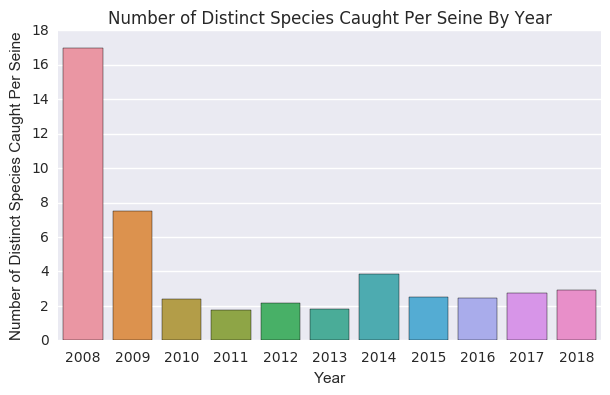

In [113]:
ax = sns.barplot(x="Year", y='Number of Distinct Species Caught Per Seine', data=grouped_db)
ax.set_title('Number of Distinct Species Caught Per Seine By Year')

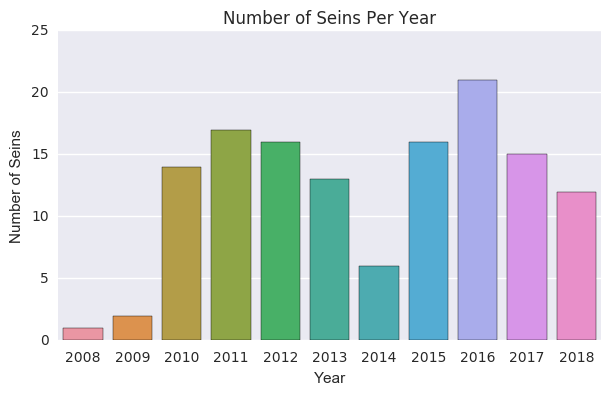

In [114]:
ax = sns.barplot(x="Year", y='# of Seins', data=grouped_db)
ax.set_ylabel('Number of Seins')
ax.set_title('Number of Seins Per Year')
ax.figure.savefig('Graphs/Number of Seins Per Year')

## But the average amount of distinct species caught per seine for the years is totally useful

In [115]:
Species_count_by_day = {}
for date in list(set(graph_db['Date'])):
    date_species = graph_db[graph_db['Date'] == date]
    species_count  = len(list(set(date_species['Corrected Common Name'])))
    Species_count_by_day[date] = species_count
    

In [116]:
species_group_db = graph_db.groupby('Date', as_index=False).sum()

In [117]:
species_group_db['Species Caught'] = [Species_count_by_day[date] for date in species_group_db['Date']]

In [118]:
species_graph_db=species_group_db[['Date', 'Species Caught']]

In [119]:
species_graph_db['Year'] = [x.year for x in species_graph_db['Date']]

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [120]:
Avg_Species_Caught_db = species_graph_db.groupby('Year', as_index = False).mean()

In [121]:
#Avg_Species_Caught_db = Avg_Species_Caught_db[Avg_Species_Caught_db['Year']<2019]

## Let's take this one

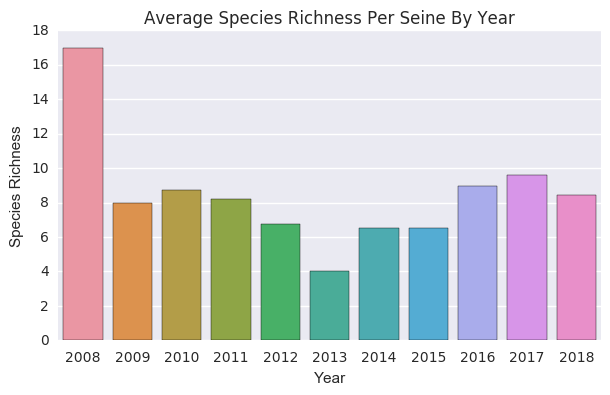

In [126]:
ax = sns.barplot(x="Year", y='Species Caught', data=Avg_Species_Caught_db)
ax.set_ylabel("Species Richness")
ax.set_title('Average Species Richness Per Seine By Year')
ax.figure.savefig('Graphs/Average Number of Distinct Species Caught Per Seine By Year')

In [127]:
recent_Avg_Species_Caught_db = Avg_Species_Caught_db[Avg_Species_Caught_db['Year'] > 2013]

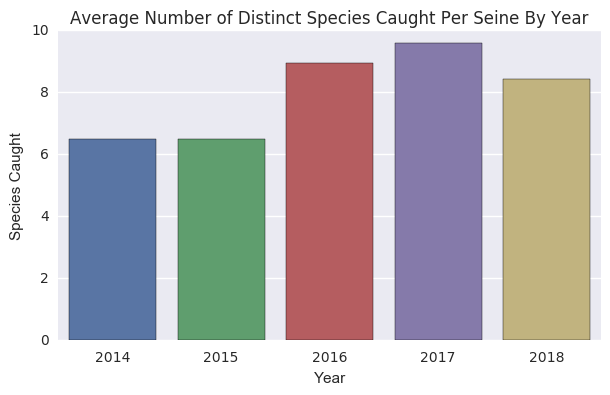

In [128]:
ax = sns.barplot(x="Year", y='Species Caught', data=recent_Avg_Species_Caught_db)
ax.set_title('Average Number of Distinct Species Caught Per Seine By Year')
ax.figure.savefig('Graphs/Recent Average Distinct Species Per Seine', bbox_inches='tight')